In [259]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [260]:
file_name = "iris.data.csv"

In [261]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [262]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [263]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [264]:
#learning rate
lr = 0.01
#number of traning steps
num_steps =100

<h2>Define Placeholder and Variables</h2>

In [265]:
tf.reset_default_graph()

#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[None,2],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')

#define the weights and initialized with random normal distribution
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

<h2>Define update rule and accuracy</h2>

In [266]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X,W),b)))
#the error between target and logit
error = Y-Y_hat


correct_prediction = tf.equal(Y_hat, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW
b_ = b + lr*db

#group two operations together
step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

In [267]:
#initialize tensorflow variables
init = tf.global_variables_initializer()
train_accuracy_a = []
#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_steps):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x_train_1,Y:y_train_1})
        train_accuracy_a.append((i, sess.run(accuracy, feed_dict={X:x_train_1, Y:y_train_1})))
    print ("Test accuracy: ", sess.run(accuracy, feed_dict={X:x_test_1, Y: y_test_1}))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W_a = np.squeeze(sess.run(W))
    b_a = np.squeeze(sess.run(b))
    

Test accuracy:  1.0


<h2>Plot</h2>

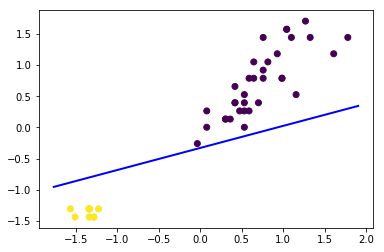

In [268]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x = np.array([np.min(np.asarray(x_test_1)[:, 0] - 0.2), np.max(np.asarray(x_test_1)[:, 1]+0.2)])
plot_y = 1 / W_a[1] * (-W_a[0] * plot_x - b_a)

plt.scatter(np.asarray(x_test_1)[:, 0], np.asarray(x_test_1)[:, 1], c=np.squeeze(np.asarray(y_test_1)), cmap='viridis')
plt.plot(plot_x, plot_y, color='blue', linewidth=2)
plt.show()

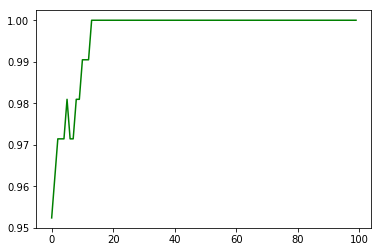

In [395]:
# plt.figure(figsize=(15, 15), dpi=80)
plt.plot([x[0] for x in train_accuracy_a], [x[1] for x in train_accuracy_a], color='green')
plt.show()

The setosa vs non-setosa species are linearly separable given only petal length & petal width features.

<h1>Part b:</h1>

In [409]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [410]:
#learning rate
lr = 0.01
#number of traning steps
num_steps =100

<h2>Define Placeholder and Variables</h2>

In [411]:
tf.reset_default_graph()

#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[None,2],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')

#define the weights and initialized with random normal distribution
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

<h2>Define update rule and accuracy</h2>

In [412]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X,W),b)))
#the error between target and logit
error = Y-Y_hat


correct_prediction = tf.equal(Y_hat, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW
b_ = b + lr*db

#group two operations together
step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

In [413]:
#initialize tensorflow variables
init = tf.global_variables_initializer()
train_accuracy_b = []
#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_steps):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x_train_2,Y:y_train_2})
        train_accuracy_b.append((i, sess.run(accuracy, feed_dict={X:x_train_2, Y:y_train_2})))
    print ("Test accuracy: ", sess.run(accuracy, feed_dict={X:x_test_2, Y: y_test_2}))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W_b = np.squeeze(sess.run(W))
    b_b = np.squeeze(sess.run(b))
    

Test accuracy:  1.0


<h2>Plot</h2>

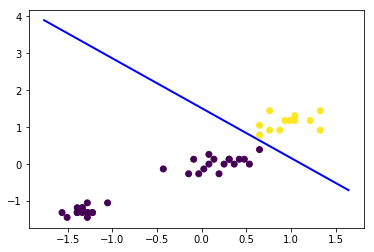

In [414]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x = np.array([np.min(np.asarray(x_test_2)[:, 0] - 0.2), np.max(np.asarray(x_test_2)[:, 1]+0.2)])
plot_y = 1 / W_b[1] * (-W_b[0] * plot_x - b_b)

plt.scatter(np.asarray(x_test_2)[:, 0], np.asarray(x_test_2)[:, 1], c=np.squeeze(np.asarray(y_test_2)), cmap='viridis')
plt.plot(plot_x, plot_y, color='blue', linewidth=2)
plt.show()

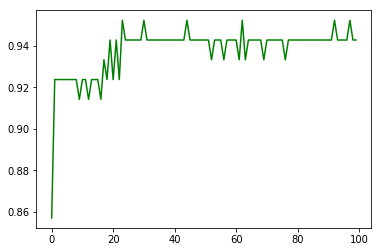

In [415]:
# plt.figure(figsize=(15, 15), dpi=80)
plt.plot([x[0] for x in train_accuracy_b], [x[1] for x in train_accuracy_b], color='green')
plt.show()

The virginica vs non-virginica species are almost linearly separable given only petal length & petal width features.

<h1>Part c:</h1>

In [508]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [509]:
#learning rate
lr = 0.1
#number of traning steps
num_steps =100

#network parameters
n_hidden_1 = 256
n_hidden_2 = 128
num_input = 4
num_classes = 3

<h2>Define placehoder and variables</h2>

In [510]:
tf.reset_default_graph()


#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.float32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='W2'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_2, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

<h2>Define the neural network</h2>

In [511]:
#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    layer_2_out = tf.nn.relu(tf.add(tf.matmul(layer_1_out,weights['W2']),biases['b2']))
    out = tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function and accuracy</h2>

In [512]:
#predicted labels
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')

#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(tf.nn.softmax(logits),1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

<h2>Execute training</h2>

In [513]:
#initialize tensorflow variables
init = tf.global_variables_initializer()
train_accuracy_c = []
#start tensorflow session

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        #run optimization
        sess.run(train_op, feed_dict={X:x_train_3, Y:y_train_3})
        
        acc = sess.run(accuracy,feed_dict={X:x_train_3, Y:y_train_3})
        train_accuracy_c.append((i, sess.run(accuracy, feed_dict={X:x_train_3, Y:y_train_3})))
        print("Step "+str(i)+", Accuracy= {:.3f}".format(acc))
    
    print("Training finished!")
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:x_test_3, Y:y_test_3}))

Step 0, Accuracy= 0.714
Step 1, Accuracy= 0.648
Step 2, Accuracy= 0.610
Step 3, Accuracy= 0.781
Step 4, Accuracy= 0.943
Step 5, Accuracy= 0.933
Step 6, Accuracy= 0.971
Step 7, Accuracy= 0.933
Step 8, Accuracy= 0.962
Step 9, Accuracy= 0.971
Step 10, Accuracy= 0.981
Step 11, Accuracy= 0.981
Step 12, Accuracy= 0.981
Step 13, Accuracy= 0.981
Step 14, Accuracy= 0.990
Step 15, Accuracy= 0.990
Step 16, Accuracy= 0.990
Step 17, Accuracy= 1.000
Step 18, Accuracy= 1.000
Step 19, Accuracy= 1.000
Step 20, Accuracy= 1.000
Step 21, Accuracy= 1.000
Step 22, Accuracy= 1.000
Step 23, Accuracy= 1.000
Step 24, Accuracy= 1.000
Step 25, Accuracy= 1.000
Step 26, Accuracy= 1.000
Step 27, Accuracy= 1.000
Step 28, Accuracy= 1.000
Step 29, Accuracy= 1.000
Step 30, Accuracy= 1.000
Step 31, Accuracy= 1.000
Step 32, Accuracy= 1.000
Step 33, Accuracy= 1.000
Step 34, Accuracy= 1.000
Step 35, Accuracy= 1.000
Step 36, Accuracy= 1.000
Step 37, Accuracy= 1.000
Step 38, Accuracy= 1.000
Step 39, Accuracy= 1.000
Step 40, A

<h2>Plot</h2>

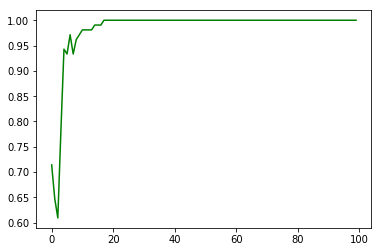

In [514]:
# plt.figure(figsize=(15, 15), dpi=80)
plt.plot([x[0] for x in train_accuracy_c], [x[1] for x in train_accuracy_c], color='green')
plt.show()